# Bag of Words

In [1]:
from functools import reduce
import numpy as np

texts = [['i', 'love', 'my', 'cat'],
         ['he', 'love', 'a', 'dog'],
         ['he', 'and', 'i', 'love', 'a', 'cat', 'and', 'a', 'dog']]

dictionary = list(enumerate(set(reduce(lambda x, y: x + y, texts))))

def vectorize(text):
    vector = np.zeros(len(dictionary))
    for i, word in dictionary:
        num = 0
        for w in text:
            if w == word:
                num += 1
        if num:
            vector[i] = num
    return vector

for t in texts:
    print(vectorize(t))

[0. 0. 1. 1. 0. 1. 1. 0.]
[0. 1. 0. 0. 1. 1. 0. 1.]
[2. 1. 0. 1. 2. 1. 1. 1.]


In [2]:
dictionary

[(0, 'and'),
 (1, 'dog'),
 (2, 'my'),
 (3, 'i'),
 (4, 'a'),
 (5, 'love'),
 (6, 'cat'),
 (7, 'he')]

# N-грами (інший підхід до токенізації)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(ngram_range=(1,1)) 
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1],
       [1, 1, 1]])

In [31]:
vect.vocabulary_

{'no': 2, 'have': 1, 'cows': 0}

In [32]:
vect = CountVectorizer(ngram_range=(1,2)) 

In [33]:
vect.fit_transform(['no i have cows', 'i have no cows']).toarray()

array([[1, 1, 1, 0, 1, 0, 1],
       [1, 1, 0, 1, 1, 1, 0]])

In [34]:
vect.vocabulary_

{'no': 4,
 'have': 1,
 'cows': 0,
 'no have': 6,
 'have cows': 2,
 'have no': 3,
 'no cows': 5}

# N-грами з літер

In [35]:
vect = CountVectorizer(ngram_range=(3,3), analyzer='char_wb') 
n1, n2, n3, n4 = vect.fit_transform(['александр', 'алексей', 'петр', 'иван']).toarray()
n1

array([1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0])

In [36]:
vect.vocabulary_

{' ал': 0,
 'але': 3,
 'лек': 14,
 'екс': 9,
 'кса': 12,
 'сан': 17,
 'анд': 5,
 'ндр': 15,
 'др ': 7,
 'ксе': 13,
 'сей': 18,
 'ей ': 8,
 ' пе': 2,
 'пет': 16,
 'етр': 10,
 'тр ': 19,
 ' ив': 1,
 'ива': 11,
 'ван': 6,
 'ан ': 4}

In [37]:
n2

array([1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])

In [38]:
from scipy.spatial.distance import euclidean
euclidean(n1, n2)

2.8284271247461903

In [39]:
euclidean(n2, n3)

3.3166247903554

# Часові дані

In [4]:
def make_harmonic_features(value, period=24):
    value *= 2 * np.pi / period
    return np.cos(value), np.sin(value)


from scipy.spatial.distance import euclidean
euclidean(make_harmonic_features(23), make_harmonic_features(1))

0.5176380902050423

In [5]:
euclidean(make_harmonic_features(9), make_harmonic_features(11))

0.5176380902050414

In [6]:
euclidean(make_harmonic_features(9), make_harmonic_features(21))

2.0

# Дані User Agent

In [7]:
ua = 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Ubuntu Chromium/56.0.2924.76 Chrome/...: 56.0.2924.76 Safari/537.36'
import user_agents
ua = user_agents.parse(ua) 

In [8]:
print(ua.is_bot)
print(ua.is_mobile)
print(ua.is_pc)
print(ua.os.family)
print(ua.os.version)
print(ua.browser.family)
print(ua.os.version)
print(ua.browser.version)

False
False
True
Ubuntu
()
Chromium
()
(56, 0, 2924)


# Feature Selection

In [9]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.datasets import make_classification
x_data_generated, y_data_generated = make_classification()
x_data_generated.shape

(100, 20)

In [11]:
y_data_generated

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0])

In [14]:
VarianceThreshold(.9).fit_transform(x_data_generated).shape

(100, 14)

In [18]:
from sklearn.feature_selection import SelectKBest, f_classif
x_data_kbest = SelectKBest(f_classif, k=3).fit_transform(x_data_generated, y_data_generated)
x_data_var = VarianceThreshold(.8).fit_transform(x_data_generated)
x_data_var.shape


(100, 16)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

print(cross_val_score(LogisticRegression(), x_data_generated, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(LogisticRegression(), x_data_kbest, y_data_generated, scoring='neg_log_loss').mean())
print(cross_val_score(LogisticRegression(), x_data_var, y_data_generated, scoring='neg_log_loss').mean())



-0.3498154537918319
-0.2990736350480906
-0.3436992911118469


In [59]:
x_data_kbest.shape

(100, 3)

In [60]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectFromModel
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [62]:
lsvc = LinearSVC(C=0.01, penalty="l1", dual=False).fit(X, y)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X)
X_new.shape

(150, 3)

# Кореляційний аналіз

In [7]:
import pandas as pd
import numpy as np
file = pd.ExcelFile('Corr5_hol.xlsx')
df = pd.read_excel(file, header = 0, index_col = 0)
df

,CD,SOD,Catalase,Cerulopl.,IgA,IgМ,IgG,С3,С4,С5,"NBT test, Spontneous, %","NBT test, activ.coef.","NBT test, Occurrences, %","NBT test, activ.coef.",Phagocytosis,NETS
exp. group,,,,,,,,,,,,,,,,
1 MLT,39.78,5.44,2.67,279.65,158.00,4722.97,2339.7,584.4,8.06,0.21,31,0.39,38,0.82,60,16
2 MLT,25.46,6.26,3.19,312.75,223.20,3502.66,3811.0,589.3,9.31,0.15,28,0.52,49,0.73,62,18
3 MLT,27.64,5.55,2.70,275.56,261.17,4117.87,2842.3,535.3,31.70,1.85,43,1.07,54,0.19,63,15
4 MLT,25.50,4.88,2.39,283.44,77.12,4080.85,2853.0,505.1,10.44,0.25,22,0.48,35,0.70,57,14
5 MLT,31.55,3.83,2.35,186.67,186.42,3443.13,2925.5,554.5,10.90,0.54,19,0.24,34,0.56,63,17
6 MLT,32.59,5.53,2.74,304.35,276.17,4107.84,3588.9,512.8,11.53,0.36,16,0.34,42,0.75,60,18


In [5]:
import matplotlib.pyplot as plt
from matplotlib import colors

class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    Code by Joe Kington
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))


def background_gradient(s, cmap='bwr', low=0, high=0):
    """
    Color correlations table according to specified colormap
    """
    rng = s.max() - s.min()
    norm = MidpointNormalize(s.min() - (rng * low), s.max() + (rng * high), 0)
    normed = norm(s.values)
    c = [colors.rgb2hex(x) for x in plt.cm.get_cmap(cmap)(normed)]
    return ['background-color: %s' % color for color in c]

def magnify():
    """
    Zoom-in table cell on mouse point
    """
    return [dict(selector="th",
                 props=[("font-size", "10pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "14pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '14pt')])]




df.corr(method='pearson').style.apply(background_gradient, axis=1) \
    .set_properties(**{'max-width': '120px', 'font-size': '10pt'})\
    .set_caption("Corr5_holod")\
    .set_precision(2)\
    .set_table_styles(magnify())

,CD,SOD,Catalase,Cerulopl.,IgA,IgМ,IgG,С3,С4,С5,"NBT test, Spontneous, %","NBT test, activ.coef.","NBT test, Occurrences, %","NBT test, activ.coef.",Phagocytosis,NETS
CD,1.00,-0.14,-0.18,-0.18,0.04,0.63,-0.53,0.32,-0.30,-0.21,-0.08,-0.40,-0.36,0.37,-0.00,0.18
SOD,-0.14,1.00,0.89,0.92,0.40,0.24,0.44,0.28,0.12,-0.00,0.41,0.42,0.72,0.12,-0.02,0.24
Catalase,-0.18,0.89,1.00,0.70,0.52,-0.13,0.64,0.53,-0.01,-0.10,0.28,0.24,0.70,0.14,0.28,0.56
Cerulopl.,-0.18,0.92,0.70,1.00,0.19,0.35,0.41,-0.03,-0.01,-0.16,0.18,0.28,0.50,0.28,-0.40,0.08
IgA,0.04,0.40,0.52,0.19,1.00,-0.17,0.51,0.09,0.46,0.45,0.20,0.31,0.69,-0.37,0.67,0.63
IgМ,0.63,0.24,-0.13,0.35,-0.17,1.00,-0.63,-0.08,0.06,0.04,0.31,0.15,-0.06,0.17,-0.46,-0.42
IgG,-0.53,0.44,0.64,0.41,0.51,-0.63,1.00,-0.03,-0.13,-0.21,-0.35,-0.09,0.37,0.15,0.17,0.69
С3,0.32,0.28,0.53,-0.03,0.09,-0.08,-0.03,1.00,-0.26,-0.23,0.30,-0.11,0.17,0.22,0.48,0.41
С4,-0.30,0.12,-0.01,-0.01,0.46,0.06,-0.13,-0.26,1.00,0.99,0.74,0.91,0.71,-0.95,0.45,-0.37
С5,-0.21,-0.00,-0.10,-0.16,0.45,0.04,-0.21,-0.23,0.99,1.00,0.72,0.85,0.63,-0.97,0.52,-0.36


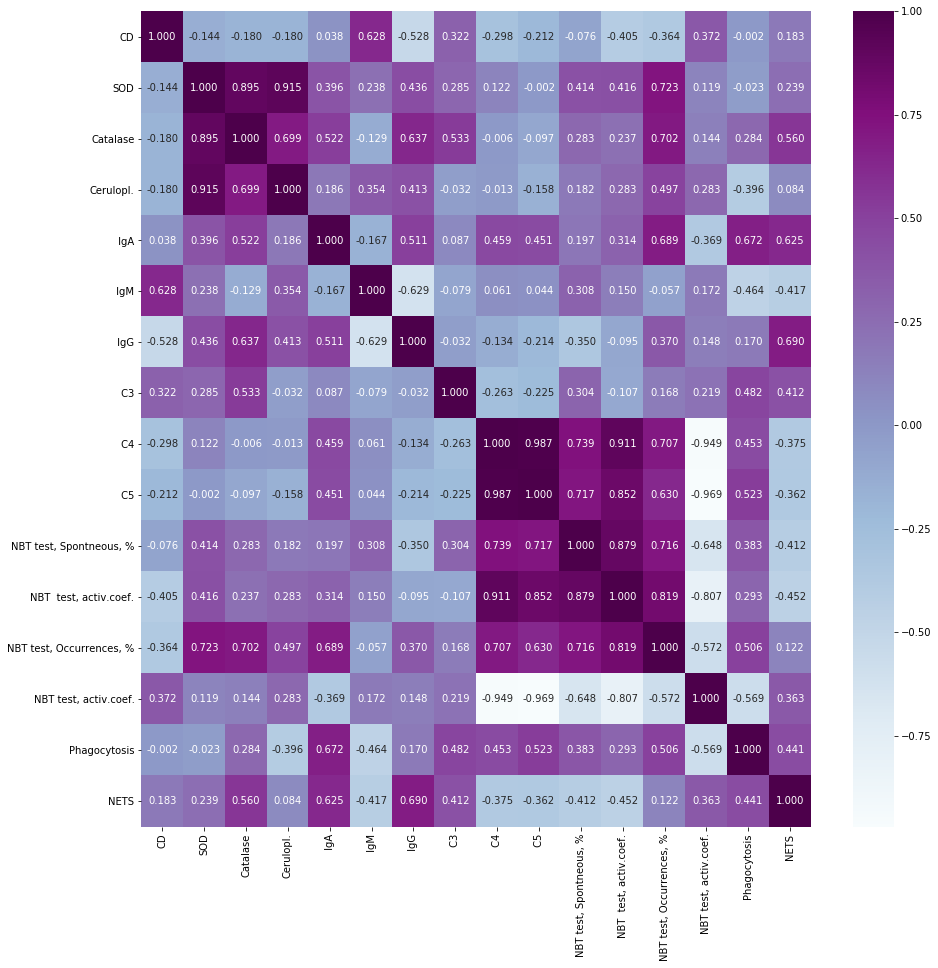

In [9]:
import seaborn as sns
plt.figure(figsize=(15, 15))
g = sns.heatmap(df.corr(method='pearson'), annot=True, fmt='.3f', cmap='BuPu')